In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import gan
import wgan
import tensorflow as tf
from matplotlib import pyplot as plt

2025-05-27 23:07:07.003961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 23:07:07.004512: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 23:07:07.007213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 23:07:07.014261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748408827.026771 1013005 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748408827.03

In [2]:
"""x_train = np.load('signals_composed/x_composed.npy')
y_train = np.load('signals_composed/y_composed.npy')"""

"x_train = np.load('signals_composed/x_composed.npy')\ny_train = np.load('signals_composed/y_composed.npy')"

In [3]:
x_kk = np.load('wpd/train_x.npy')
y_kk = np.load('wpd/train_y.npy')

In [4]:
x_kk.shape

(111920, 2464)

In [5]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
])

In [6]:
def instance_concat(np_array):
    new_array = list()
    for i in np_array:
        concated = np.concatenate((i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12], i[13], i[14], i[15],
                                   i[16], i[17], i[18], i[19], i[20], i[21]))
        new_array.append(concated)
    return np.array(new_array)

In [7]:
def instance_deconcat(np_array, points_size=1024):
    final_x = list()
    for i in range(len(np_array)):
        opt_array = list()
        opt_array.append(np_array[i, : points_size])
        for j in range(1, 22):
            opt_array.append(np_array[i, points_size*j:points_size*(j+1)])
        final_x.append(opt_array)
    return np.array(final_x)

In [8]:
x_train_scaled = pipeline.fit_transform(x_kk)

In [9]:
x_train_scaled = instance_deconcat(x_train_scaled, 112)

In [10]:
x_train_scaled.shape

(111920, 22, 112)

In [11]:
x_mysz = gan.get_seizure_by_type('mysz', x_train_scaled, y_kk)
x_tnsz = gan.get_seizure_by_type('tnsz', x_train_scaled, y_kk)
x_tcsz = gan.get_seizure_by_type('tcsz', x_train_scaled, y_kk)

In [12]:
mysz_model = wgan.make_images(x_mysz, 200)

E0000 00:00:1748408835.558696 1013005 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1748408835.560558 1013005 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 78848)          │     7,963,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 11, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 11, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 22, 56, 128)    │       409,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 22, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 22, 112, 64)    │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 112, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 22, 112, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 22, 112, 1)     │         1,601 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 22, 112, 1)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,581,121 (32.73 MB)

 Trainable params: 8,580,481 (32.73 MB)

 Non-trainable params: 640 (2.50 KB)

None


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 11, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 11, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 28, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 6, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 14, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 3, 14, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 14, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 2, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3584)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         3,585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,425 (1.49 MB)

 Trainable params: 391,425 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200


E0000 00:00:1748408844.534464 1013005 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_1_22/leaky_re_lu_4_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_1_22/conv2d_1_2/BiasAdd'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - d_loss: 7.3506 - g_loss: 0.6731
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: 4.9135 - g_loss: 1.9420
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: 1.1142 - g_loss: 3.9768   
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -4.9337 - g_loss: 7.6477
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -18.8592 - g_loss: 20.0211   
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -44.4449 - g_loss: 47.9883
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -53.7925 - g_loss: 63.3578
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -52.3781 - g_loss: 52.5698
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -45.8257 - g_loss: 49.0489
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -25.8291 - g_loss: 26.4797   
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -40.7312 - g_loss: 40.5690
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - d_loss: -40.5682 - g_los

In [13]:
mysz_signal_generator = mysz_model.generator
mysz_signal_generator.save('mysz_generator.keras')

In [14]:
def generate_signals(generator, num_images=1, latent_dim=100):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_signals = generator.predict(noise)
    #generated_signals = 0.5 * generated_signals + 0.5

    return generated_signals

In [29]:
new_signals = generate_signals(mysz_signal_generator, 1000)
print(new_signals.shape)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
(1000, 22, 112, 1)


In [30]:
new_signals_sq = tf.squeeze(new_signals, axis=-1)
new_signals_sq = new_signals_sq.numpy()
print(new_signals_sq.shape)

(1000, 22, 112)


In [31]:
new_signals_abs = np.abs(new_signals_sq)

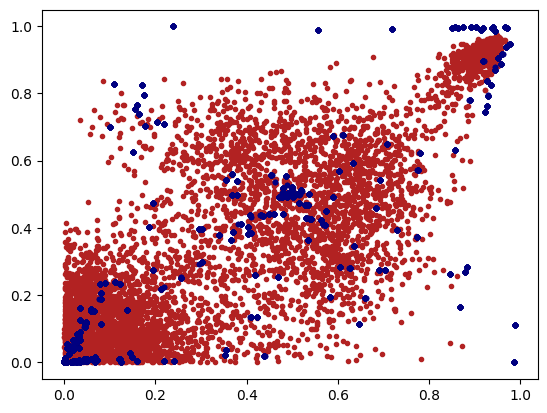

In [33]:
plt.plot(new_signals_abs[:50, 0], new_signals_abs[:50, 1], '.', label='Generated samples', color='firebrick')
plt.plot(x_mysz[:50, 0], x_mysz[:50, 1], '.', label='Real samples', color='navy')
plt.show()

In [19]:
tnsz_model = wgan.make_images(x_tnsz, 200)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 78848)          │     7,963,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 11, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 11, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 22, 56, 128)    │       409,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 22, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 22, 112, 64)    │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 22, 112, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 22, 112, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 22, 112, 1)     │         1,601 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 22, 112, 1)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,581,121 (32.73 MB)

 Trainable params: 8,580,481 (32.73 MB)

 Non-trainable params: 640 (2.50 KB)

None


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 11, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 11, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 28, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 6, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 14, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 3, 14, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 14, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 2, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3584)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         3,585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,425 (1.49 MB)

 Trainable params: 391,425 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


E0000 00:00:1748409069.542363 1013005 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_19/leaky_re_lu_10_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_19/conv2d_4_1/BiasAdd'.


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - d_loss: -9.9377 - g_loss: 12.0612
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - d_loss: -23.7782 - g_loss: 20.5683
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - d_loss: -15.4351 - g_loss: 26.2736
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - d_loss: -17.9509 - g_loss: 35.1422
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - d_loss: -17.2537 - g_loss: 29.1940
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - d_loss: -14.7406 - g_loss: 23.7296
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - d_loss: -12.1150 - g_loss: 18.7193
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - d_loss: -9.4703 - g_loss: 15.4970
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - d_loss: -8.3182 - g_loss: 12.1786
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - d_loss: -7.2843 - g_loss: 9.2453
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - d_loss: -5.8601 - g_loss: 6.9237
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - d_loss: -5.8359 - g_loss: 6.8510
Epoch 13

In [20]:
tnsz_signal_generator = tnsz_model.generator
tnsz_signal_generator.save('tnsz_generator.keras')

In [34]:
new_tnsz_signals = generate_signals(tnsz_signal_generator, 1000)
print(new_tnsz_signals.shape)
new_signals_tnsz = tf.squeeze(new_tnsz_signals, axis=-1)
new_signals_tnsz = new_signals_tnsz.numpy()
new_signals_tnsz = np.absolute(new_signals_tnsz)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
(1000, 22, 112, 1)


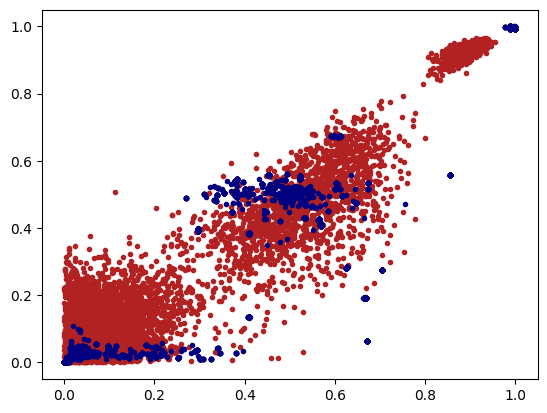

In [35]:
plt.plot(new_signals_tnsz[:50, 0], new_signals_tnsz[:50, 1], '.', label='Generated samples', color='firebrick')
plt.plot(x_tnsz[:50, 0], x_tnsz[:50, 1], '.', label='Real samples', color='navy')
plt.show()

In [23]:
tcsz_model = wgan.make_images(x_tcsz, 200)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 78848)          │     7,963,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 11, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 11, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 11, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 22, 56, 128)    │       409,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 22, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 22, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 22, 112, 64)    │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 22, 112, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 22, 112, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 22, 112, 1)     │         1,601 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 22, 112, 1)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,581,121 (32.73 MB)

 Trainable params: 8,580,481 (32.73 MB)

 Non-trainable params: 640 (2.50 KB)

None


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 11, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 11, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 11, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 28, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 6, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 14, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 3, 14, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 14, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 2, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3584)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         3,585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,425 (1.49 MB)

 Trainable params: 391,425 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


E0000 00:00:1748409356.541498 1013005 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_5_19/leaky_re_lu_18_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_5_19/conv2d_9_1/BiasAdd'.


9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - d_loss: -5.1325 - g_loss: 8.0312
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -12.7408 - g_loss: 25.2397
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -16.2920 - g_loss: 35.7825
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -10.9655 - g_loss: 26.8519
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -11.2610 - g_loss: 23.8137
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - d_loss: -7.0619 - g_loss: 16.1245
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -6.6640 - g_loss: 14.7546
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -5.6757 - g_loss: 12.0316
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -5.0959 - g_loss: 10.7672
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -4.4326 - g_loss: 9.1802
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - d_loss: -4.4815 - g_loss: 9.1945
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - d_loss: -4.0051 - g_loss: 7.6742


In [24]:
tcsz_signal_generator = tcsz_model.generator
tcsz_signal_generator.save('tcsz_generator.keras')

In [36]:
new_tcsz_signals = generate_signals(tcsz_signal_generator, 1000)
print(new_tcsz_signals.shape)
new_signals_tcsz = tf.squeeze(new_tcsz_signals, axis=-1)
new_signals_tcsz = new_signals_tcsz.numpy()
new_signals_tcsz = np.absolute(new_signals_tcsz)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
(1000, 22, 112, 1)


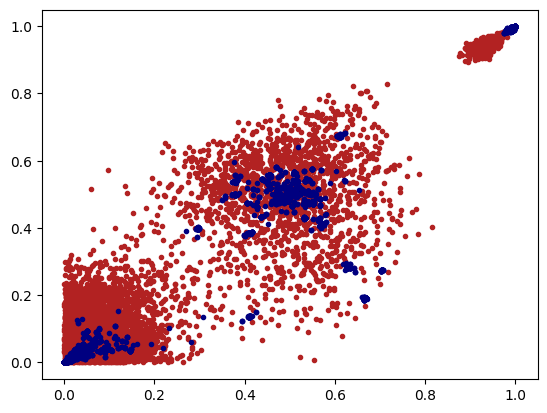

In [37]:
plt.plot(new_signals_tcsz[:50, 0], new_signals_tcsz[:50, 1], '.', label='Generated samples', color='firebrick')
plt.plot(x_tcsz[:50, 0], x_tcsz[:50, 1], '.', label='Real samples', color='navy')
plt.show()

In [38]:
np.save('mysz_extra_samples.npy', new_signals_abs, allow_pickle=True)
np.save('tnsz_extra_samples.npy', new_signals_tnsz, allow_pickle=True)
np.save('tcsz_extra_samples.npy', new_signals_tcsz, allow_pickle=True)